# Final Project 1 - Kelompok 1
___
PYTN-KS17-01 <br>
Anggota: 
- Abigail Angginaomi 	
- Jaya Hari Santoso	
- Muhammad Zaisya Fitriannuur Rahman 	
- Rheina Febrianti Khairunissa 

## Latar Belakang

Pada Final Project 1 ini menggunakan data "Uber and Lyft Dataset Boston, MA" yang berisikan riwayat pemesanan Taxi Online dengan jumlah data 57 atribut dengan 693071 rows. Data ini diambil dari situs Kaggle. Data mengenai riwayat pemesanan taksi online adalah sumber informasi yang berharga dalam pemahaman perilaku pengguna dan dinamika industri transportasi berbasis aplikasi. Dalam era digital ini, aplikasi taksi online seperti Uber, Lyft, Grab, dan sejenisnya telah mengubah cara orang memesan dan menggunakan taksi. Riwayat pemesanan taksi online mencakup informasi mengenai lokasi awal dan tujuan perjalanan, waktu pemesanan, jenis layanan yang digunakan, penilaian pengemudi, biaya perjalanan, serta preferensi pengguna. Data ini memberikan pemahaman yang dalam tentang kebutuhan dan kebiasaan pengguna, membantu perusahaan dalam meningkatkan kualitas layanan dan efisiensi operasional, serta mendukung penelitian dalam hal mobilitas perkotaan dan analisis pola perjalanan. Selain itu, data ini juga dapat digunakan untuk mengidentifikasi tren dalam industri transportasi dan perubahan dalam preferensi pengguna seiring waktu, yang penting dalam pengambilan keputusan bisnis dan perencanaan transportasi perkotaan yang berkelanjutan. Objective yang ingin dicapai ialah mengetahui faktor apa saja yang berpengaruh terhadap tarif taksi online di Boston, MA.

## Import Libraries

Berikut merupakan libraries yang digunakan untuk melakukan final project 1 ini:

In [1]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import datetime
import calendar
from datetime import date
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import f_regression
import pickle

## Data Loading

Melakukan loading dataset

In [2]:
df = pd.read_csv('rideshare_kaggle.csv')
print('Data berhasil diinput!')

Data berhasil diinput!


Melakukan pengaturan agar tidak memberi batasan maksimal untuk kolom yang ditampilkan

In [3]:
pd.set_option("display.max_columns", None)

Melihat 5 baris teratas dari dataset

In [4]:
df.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.0,0.44,1.0,42.2148,-71.033,42.34,37.12,Mostly Cloudy,Rain throughout the day.,0.0000,0.0,0.68,8.66,9.17,1545015600,10.000,43.68,1544968800,34.19,1545048000,37.95,1544968800,27.39,1545044400,partly-cloudy-night,32.70,1021.98,57,0.72,0,10.000,303.8,1544962084,1544994864,0.30,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.0,0.44,1.0,42.2148,-71.033,43.58,37.35,Rain,"Rain until morning, starting again in the eve...",0.1299,1.0,0.94,11.98,11.98,1543291200,4.786,47.30,1543251600,42.10,1543298400,43.92,1543251600,36.20,1543291200,rain,41.83,1003.97,90,1.00,0,4.786,291.1,1543232969,1543266992,0.64,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,7.0,0.44,1.0,42.2148,-71.033,38.33,32.93,Clear,Light rain in the morning.,0.0000,0.0,0.75,7.33,7.33,1543334400,10.000,47.55,1543320000,33.10,1543402800,44.12,1543320000,29.11,1543392000,clear-night,31.10,992.28,240,0.03,0,10.000,315.7,1543319437,1543353364,0.68,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,26.0,0.44,1.0,42.2148,-71.033,34.38,29.63,Clear,Partly cloudy throughout the day.,0.0000,0.0,0.73,5.28,5.28,1543514400,10.000,45.03,1543510800,28.90,1543579200,38.53,1543510800,26.20,1543575600,clear-night,26.64,1013.73,310,0.00,0,10.000,291.1,1543492370,1543526114,0.75,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,9.0,0.44,1.0,42.2148,-71.033,37.44,30.88,Partly Cloudy,Mostly cloudy throughout the day.,0.0000,0.0,0.70,9.14,9.14,1543446000,10.000,42.18,1543420800,36.71,1543478400,35.75,1543420800,30.29,1543460400,partly-cloudy-night,28.61,998.36,303,0.44,0,10.000,347.7,1543405904,1543439738,0.72,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


Keterangan: <br>
- id: Unique identifier for each column
- timestamp: Unix timestamp
- hour: Hour of the day
- day: Day of the week
- month: Month in a year
- datetime: Date value
- timezone: Timezone
- source: Initial source of the ride
- destination: Destination of the ride
- cab_type: The type of cab
- price: Price of the ride
- distance: Total distance of the requested ride
- surge_multiplier: Times of the normal price
- temperature: Temperature of the ride
- apparentTemperature: Apparent temperatur of the ride
- summary: Weather report summary of the day
- humidity: Humidity of the ride
- windSpeed: Wind speed of the ride
- windGust: Wind gust of the ride
- uvIndex: UV index of the ride

Melihat ukuran dari Dataset

In [5]:
df.shape

(693071, 57)

Melihat rangkuman informasi tentang dataset

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

Menampilkan ringkasan statistik deskriptif dari dataframe

In [7]:
df.describe()

,timestamp,hour,day,month,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
count,6.930710e+05,693071.000000,693071.000000,693071.000000,637976.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,6.930710e+05,693071.000000,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,6.930710e+05,6.930710e+05,693071.000000,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05
mean,1.544046e+09,11.619137,17.794365,11.586684,16.545125,2.189430,1.013870,42.338172,-71.066151,39.584388,35.881222,0.008922,0.146076,0.741119,6.186253,8.469860,1.544049e+09,8.467970,45.040982,1.544050e+09,34.150736,1.544102e+09,41.614054,1.544050e+09,30.139824,1.544099e+09,31.656256,1010.094766,220.055853,0.686502,0.248908,8.467970,313.513635,1.544027e+09,1.544060e+09,0.579066,0.037374,1.544044e+09,33.457774,1.544042e+09,45.261313,1.544047e+09,29.731002,1.544048e+09,41.997343,1.544048e+09
std,6.891925e+05,6.948114,9.982286,0.492429,9.324359,1.138937,0.091641,0.047840,0.020302,6.726084,7.918707,0.026901,0.328938,0.138595,3.148223,5.289179,6.928244e+05,2.602888,5.996541,6.937921e+05,6.383163,6.922923e+05,7.666138,6.941699e+05,8.057468,6.927378e+05,9.142355,13.472899,99.102736,0.358534,0.474097,2.602888,27.953061,6.911393e+05,6.906634e+05,0.244705,0.055214,6.912028e+05,6.467224,6.901954e+05,5.645046,6.901353e+05,7.110494,6.871862e+05,6.936841,6.910777e+05
min,1.543204e+09,0.000000,1.000000,11.000000,2.500000,0.020000,1.000000,42.214800,-71.105400,18.910000,12.130000,0.000000,0.000000,0.380000,0.450000,0.800000,1.543151e+09,0.717000,32.680000,1.543154e+09,17.850000,1.543234e+09,22.620000,1.543187e+09,11.810000,1.543234e+09,4.390000,988.090000,2.000000,0.000000,0.000000,0.717000,269.400000,1.543147e+09,1.543181e+09,0.090000,0.000000,1.543162e+09,15.630000,1.543122e+09,33.510000,1.543154e+09,11.810000,1.543136e+09,28.950000,1.543187e+09
25%,1.543444e+09,6.000000,13.000000,11.000000,9.000000,1.280000,1.000000,42.350300,-71.081000,36.450000,31.910000,0.000000,0.000000,0.640000,3.410000,4.060000,1.543432e+09,8.432000,42.570000,1.543439e+09,30.170000,1.543489e+09,36.570000,1.543439e+09,27.700000,1.543478e+09,27.490000,999.820000,124.000000,0.370000,0.000000,8.432000,290.900000,1.543406e+09,1.543440e+09,0.300000,0.000000,1.543421e+09,30.170000,1.543399e+09,42.570000,1.543439e+09,27.760000,1.543399e+09,36.570000,1.543439e+09
50%,1.543737e+09,12.000000,17.000000,12.000000,13.500000,2.160000,1.000000,42.351900,-71.063100,40.490000,35.900000,0.000000,0.000000,0.710000,5.910000,7.550000,1.543756e+09,9.880000,44.680000,1.543788e+09,34.180000,1.543817e+09,40.950000,1.543788e+09,30.030000,1.543817e+09,30.690000,1009.250000,258.000000,0.820000,0.000000,9.880000,307.400000,1.543752e+09,1.543785e+09,0.680000,0.000400,1.543770e+09,34.240000,1.543727e+09,44.680000,1.543788e+09,30.130000,1.543745e+09,40.950000,1.543788e+09
75%,1.544828e+09,18.000000,28.000000,12.000000,22.500000,2.920000,1.000000,42.364700,-71.054200,43.580000,40.080000,0.000000,0.000000,0.880000,8.410000,11.740000,1.544846e+09,9.996000,46.910000,1.544814e+09,38.730000,1.544836e+09,44.120000,1.544818e+09

Menampilkan jumlah missing value pada dataset

In [8]:
df.isnull().sum()

id                                 0
timestamp                          0
hour                               0
day                                0
month                              0
datetime                           0
timezone                           0
source                             0
destination                        0
cab_type                           0
product_id                         0
name                               0
price                          55095
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime                       0
v

Menampilkan daftar nama kolom dalam sebuah dataset

In [9]:
df.columns

Index(['id', 'timestamp', 'hour', 'day', 'month', 'datetime', 'timezone',
       'source', 'destination', 'cab_type', 'product_id', 'name', 'price',
       'distance', 'surge_multiplier', 'latitude', 'longitude', 'temperature',
       'apparentTemperature', 'short_summary', 'long_summary',
       'precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'windGustTime', 'visibility', 'temperatureHigh',
       'temperatureHighTime', 'temperatureLow', 'temperatureLowTime',
       'apparentTemperatureHigh', 'apparentTemperatureHighTime',
       'apparentTemperatureLow', 'apparentTemperatureLowTime', 'icon',
       'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex',
       'visibility.1', 'ozone', 'sunriseTime', 'sunsetTime', 'moonPhase',
       'precipIntensityMax', 'uvIndexTime', 'temperatureMin',
       'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime',
       'apparentTemperatureMin', 'apparentTemperatureMinTime',
       'apparentTemperat

## Data Cleaning

Data cleaning dilakukan sebagai proses yang melibatkan identifikasi, koreksi, dan penghapusan data yang tidak valid, tidak akurat, atau tidak lengkap dalam dataset. Tujuan dari data cleaning adalah untuk memastikan bahwa data yang digunakan dalam analisis atau pemodelan adalah data yang berkualitas, sehingga hasil analisis atau model yang dibangun lebih dapat diandalkan. 

Melakukan pengecekan duplicated pada dataset

In [10]:
df.duplicated().sum()

0

Tidak terdapat duplicated di dalam dataset

Melakukan pengecekan missing value pada atribut 'Price'

In [11]:
df['price'].isnull().sum()

55095

Karena terdapat 55095 baris yang merupakan nilai kosong, maka dibuatlah dataset baru yang menghilangkan/drop missing value pada atribut 'Price'

In [12]:
df2 = df.drop(df[df['price'].isnull()].index)

Compare ukuran dataset awal vs dataset yang sudah didrop missing valuenya

In [13]:
df.shape, df2.shape

((693071, 57), (637976, 57))

Pengecekan kembali jumlah missing value di dataset terbaru

In [14]:
df2.isnull().sum()

id                             0
timestamp                      0
hour                           0
day                            0
month                          0
datetime                       0
timezone                       0
source                         0
destination                    0
cab_type                       0
product_id                     0
name                           0
price                          0
distance                       0
surge_multiplier               0
latitude                       0
longitude                      0
temperature                    0
apparentTemperature            0
short_summary                  0
long_summary                   0
precipIntensity                0
precipProbability              0
humidity                       0
windSpeed                      0
windGust                       0
windGustTime                   0
visibility                     0
temperatureHigh                0
temperatureHighTime            0
temperatur

Melakukan crosstab atribut product_id dan name

In [15]:
pd.crosstab(df.product_id, df.name)

name,Black,Black SUV,Lux,Lux Black,Lux Black XL,Lyft,Lyft XL,Shared,Taxi,UberPool,UberX,UberXL,WAV
product_id,,,,,,,,,,,,,
55c66225-fbe7-4fd5-9072-eab1ece5e23e,0,0,0,0,0,0,0,0,0,0,55094,0,0
6c84fd89-3f11-4782-9b50-97c468b19529,55095,0,0,0,0,0,0,0,0,0,0,0,0
6d318bcc-22a3-4af6-bddd-b409bfce1546,0,55096,0,0,0,0,0,0,0,0,0,0,0
6f72dfc5-27f1-42e8-84db-ccc7a75f6969,0,0,0,0,0,0,0,0,0,0,0,55096,0
8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,0,0,0,0,0,0,0,0,55095,0,0,0,0
997acbb5-e102-41e1-b155-9df7de0a73f2,0,0,0,0,0,0,0,0,0,55091,0,0,0
9a0e7b09-b92b-4c41-9779-2ad22b4d779d,0,0,0,0,0,0,0,0,0,0,0,0,55096
lyft,0,0,0,0,0,51235,0,0,0,0,0,0,0
lyft_line,0,0,0,0,0,0,0,51233,0,0,0,0,0


Diperoleh hasil bahwa kedua atribut tersebut sama, sehingga dilakukan penghapusan atribut product_id karena sudah terwakilkan oleh Name. Sehingga hanya membutuhkan salah satu saja.

Melakukan inisiasi atribut yang akan dihapus. Penghapusan ini dilakukan karena atribut tersebut memiliki kesamaan dan dapat diwakilkan dengan atribut lainnya.

In [16]:
remove1_cols = ["id", "timestamp", "timezone", "product_id", "latitude", "longitude"]

remove2_cols = ["precipIntensity", "precipProbability", "windGustTime", "temperatureHigh", "temperatureHighTime", "temperatureLow", 
                "temperatureLowTime", "apparentTemperatureHigh", "apparentTemperatureHighTime", "apparentTemperatureLow", 
                "apparentTemperatureLowTime", "icon", "dewPoint", "windBearing", "uvIndex", "visibility.1", "ozone", "sunriseTime", 
                "sunsetTime", "uvIndexTime", "temperatureMin", "temperatureMinTime", "temperatureMax", "temperatureMaxTime", 
                "apparentTemperatureMin", "apparentTemperatureMinTime", "apparentTemperatureMax", "apparentTemperatureMaxTime", 
                "apparentTemperature"]

Membuat dataset baru dengan menghapus inisasi yang sudah dibuat sebelumnya.

In [17]:
df3 = df2.drop(remove1_cols, axis=1)

df3 = df3.drop(remove2_cols, axis=1)

Mengecek kembali 5 baris teratas

In [18]:
df3.head()

,hour,day,month,datetime,source,destination,cab_type,name,price,distance,surge_multiplier,temperature,short_summary,long_summary,humidity,windSpeed,windGust,visibility,pressure,cloudCover,moonPhase,precipIntensityMax
0,9,16,12,2018-12-16 09:30:07,Haymarket Square,North Station,Lyft,Shared,5.0,0.44,1.0,42.34,Mostly Cloudy,Rain throughout the day.,0.68,8.66,9.17,10.000,1021.98,0.72,0.30,0.1276
1,2,27,11,2018-11-27 02:00:23,Haymarket Square,North Station,Lyft,Lux,11.0,0.44,1.0,43.58,Rain,"Rain until morning, starting again in the eve...",0.94,11.98,11.98,4.786,1003.97,1.00,0.64,0.1300
2,1,28,11,2018-11-28 01:00:22,Haymarket Square,North Station,Lyft,Lyft,7.0,0.44,1.0,38.33,Clear,Light rain in the morning.,0.75,7.33,7.33,10.000,992.28,0.03,0.68,0.1064
3,4,30,11,2018-11-30 04:53:02,Haymarket Square,North Station,Lyft,Lux Black XL,26.0,0.44,1.0,34.38,Clear,Partly cloudy throughout the day.,0.73,5.28,5.28,10.000,1013.73,0.00,0.75,0.0000
4,3,29,11,2018-11-29 03:49:20,Haymarket Square,North Station,Lyft,Lyft XL,9.0,0.44,1.0,37.44,Partly Cloudy,Mostly cloudy throughout the day.,0.70,9.14,9.14,10.000,998.36,0.44,0.72,0.0001


Melihat banyaknya nilai dari masing-masing atribut:

In [19]:
for col in df3.columns:
    print(col,': ')
    print(df3[col].value_counts())
    print("  ")
    print("  ")

hour : 
0     29872
23    29355
17    28075
12    28017
13    27977
14    27976
16    27972
18    27958
11    27946
10    27918
15    27868
22    27093
9     26673
2     26323
1     26310
4     26125
21    25549
3     25530
19    25410
6     25147
20    24620
5     22995
7     22930
8     22337
Name: hour, dtype: int64
  
  
day : 
27    70135
28    67842
29    55222
1     41680
30    41544
16    41359
17    41354
14    41344
15    41332
3     41323
2     41298
13    35496
18    33329
26    29028
4     11627
10     2534
9      1529
Name: day, dtype: int64
  
  
month : 
12    374205
11    263771
Name: month, dtype: int64
  
  
datetime : 
2018-11-26 23:33:14    151
2018-11-29 02:29:08    149
2018-11-29 02:47:08    146
2018-11-27 00:03:14    146
2018-11-29 04:38:08    146
                      ... 
2018-12-03 07:33:03      3
2018-11-30 21:33:07      3
2018-12-15 06:05:07      3
2018-12-13 15:10:13      1
2018-11-30 13:17:58      1
Name: datetime, Length: 31350, dtype: int64
  
  
source

Membuat kolom baru yaitu Rate/Mile dengan perhitungan dari price(tarif) dibagi dengan distance(jarak)

In [20]:
df4 = df3.copy()

df4["Rate_per_mile"] = df4["price"] / df4["distance"]

Mengecek kembali 5 baris teratas

In [21]:
df4.head()

,hour,day,month,datetime,source,destination,cab_type,name,price,distance,surge_multiplier,temperature,short_summary,long_summary,humidity,windSpeed,windGust,visibility,pressure,cloudCover,moonPhase,precipIntensityMax,Rate_per_mile
0,9,16,12,2018-12-16 09:30:07,Haymarket Square,North Station,Lyft,Shared,5.0,0.44,1.0,42.34,Mostly Cloudy,Rain throughout the day.,0.68,8.66,9.17,10.000,1021.98,0.72,0.30,0.1276,11.363636
1,2,27,11,2018-11-27 02:00:23,Haymarket Square,North Station,Lyft,Lux,11.0,0.44,1.0,43.58,Rain,"Rain until morning, starting again in the eve...",0.94,11.98,11.98,4.786,1003.97,1.00,0.64,0.1300,25.000000
2,1,28,11,2018-11-28 01:00:22,Haymarket Square,North Station,Lyft,Lyft,7.0,0.44,1.0,38.33,Clear,Light rain in the morning.,0.75,7.33,7.33,10.000,992.28,0.03,0.68,0.1064,15.909091
3,4,30,11,2018-11-30 04:53:02,Haymarket Square,North Station,Lyft,Lux Black XL,26.0,0.44,1.0,34.38,Clear,Partly cloudy throughout the day.,0.73,5.28,5.28,10.000,1013.73,0.00,0.75,0.0000,59.090909
4,3,29,11,2018-11-29 03:49:20,Haymarket Square,North Station,Lyft,Lyft XL,9.0,0.44,1.0,37.44,Partly Cloudy,Mostly cloudy throughout the day.,0.70,9.14,9.14,10.000,998.36,0.44,0.72,0.0001,20.454545


Membuat atribut baru dengan mengekstrak hari dari atribut date time/tanggal.

In [22]:
df4['datetime'] = df4['datetime'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d %H:%M:%S"))
df4['day_of_the_week'] = df4['datetime'].apply(lambda x: calendar.day_name[x.weekday()])

Menghapus kolom datetime yang diganti dengan atribut baru yang telah dibuat sebelumnya

In [23]:
df4 = df4.drop(["datetime"], axis=1)

Mengecek kembali 5 baris teratas 

In [24]:
df4.head()

,hour,day,month,source,destination,cab_type,name,price,distance,surge_multiplier,temperature,short_summary,long_summary,humidity,windSpeed,windGust,visibility,pressure,cloudCover,moonPhase,precipIntensityMax,Rate_per_mile,day_of_the_week
0,9,16,12,Haymarket Square,North Station,Lyft,Shared,5.0,0.44,1.0,42.34,Mostly Cloudy,Rain throughout the day.,0.68,8.66,9.17,10.000,1021.98,0.72,0.30,0.1276,11.363636,Sunday
1,2,27,11,Haymarket Square,North Station,Lyft,Lux,11.0,0.44,1.0,43.58,Rain,"Rain until morning, starting again in the eve...",0.94,11.98,11.98,4.786,1003.97,1.00,0.64,0.1300,25.000000,Tuesday
2,1,28,11,Haymarket Square,North Station,Lyft,Lyft,7.0,0.44,1.0,38.33,Clear,Light rain in the morning.,0.75,7.33,7.33,10.000,992.28,0.03,0.68,0.1064,15.909091,Wednesday
3,4,30,11,Haymarket Square,North Station,Lyft,Lux Black XL,26.0,0.44,1.0,34.38,Clear,Partly cloudy throughout the day.,0.73,5.28,5.28,10.000,1013.73,0.00,0.75,0.0000,59.090909,Friday
4,3,29,11,Haymarket Square,North Station,Lyft,Lyft XL,9.0,0.44,1.0,37.44,Partly Cloudy,Mostly cloudy throughout the day.,0.70,9.14,9.14,10.000,998.36,0.44,0.72,0.0001,20.454545,Thursday


Membuat atribut baru yaitu Route dengan menggabungkan source/asal dengan atribut destination/tujuan

In [25]:
df4["Route"] = df4["source"] + "-" + df4['destination']
df4["Route"]

0         Haymarket Square-North Station
1         Haymarket Square-North Station
2         Haymarket Square-North Station
3         Haymarket Square-North Station
4         Haymarket Square-North Station
                       ...              
693065                West End-North End
693066                West End-North End
693067                West End-North End
693069                West End-North End
693070                West End-North End
Name: Route, Length: 637976, dtype: object

## Exploratory Data Analysis

Proses EDA  dilakukan dalam analisis data yang bertujuan untuk menggali pemahaman awal tentang data, mengidentifikasi pola, hubungan, anomali, dan tren dalam data sebelum melakukan analisis statistik yang lebih mendalam atau membangun model.

Menampilkan ringkasan statistik deskriptif dari dataframe

In [26]:
df4.describe()

,hour,day,month,price,distance,surge_multiplier,temperature,humidity,windSpeed,windGust,visibility,pressure,cloudCover,moonPhase,precipIntensityMax,Rate_per_mile
count,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000
mean,11.618528,17.797674,11.586550,16.545125,2.189261,1.015068,39.582406,0.741056,6.186795,8.470616,8.469180,1010.092744,0.686291,0.579076,0.037369,9.687674
std,6.948776,9.982083,0.492452,9.324359,1.135413,0.095422,6.725500,0.138575,3.147856,5.288683,2.601828,13.475580,0.358599,0.244674,0.055216,13.705589
min,0.000000,1.000000,11.000000,2.500000,0.020000,1.000000,18.910000,0.380000,0.450000,0.800000,0.717000,988.090000,0.000000,0.090000,0.000000,0.556586
25%,6.000000,13.000000,11.000000,9.000000,1.270000,1.000000,36.450000,0.640000,3.410000,4.060000,8.432000,999.820000,0.370000,0.300000,0.000000,4.661017
50%,12.000000,17.000000,12.000000,13.500000,2.160000,1.000000,40.490000,0.710000,5.910000,7.550000,9.880000,1009.250000,0.820000,0.680000,0.000400,7.492326
75%,18.000000,28.000000,12.000000,22.500000,2.930000,1.000000,43.580000,0.880000,8.410000,11.740000,9.996000,1021.860000,1.000000,0.790000,0.091600,11.538462
max,23.000000,30.000000,12.000000,97.500000,7.860000,3.000000,57.220000,0.960000,15.000000,27.250000,10.000000,1035.550000,1.000000,0.930000,0.145900,1375.000000


Dari hasil statistik deskriptif di atas didapatkan bahwa:
- Max Distance / Jarak terjauh ada di 7.86 miles dengan Max Price: $ 97.5
- Mean Temperature di Boston, MA berada di 39.58 °F
- Mean Hour / Rata-rata pemesanan Taksi Online berada di jam 11 

Menampilkan statistik descriptif pada data kategori

In [27]:
df4.describe(include='O')

,source,destination,cab_type,name,short_summary,long_summary,day_of_the_week,Route
count,637976,637976,637976,637976,637976,637976,637976,637976
unique,12,12,2,12,9,11,7,72
top,Financial District,Financial District,Uber,UberXL,Overcast,Mostly cloudy throughout the day.,Tuesday,Financial District-South Station
freq,54197,54192,330568,55096,201429,186262,115091,9534


Dari hasil statistik deskriptif pada data kategori di atas didapatkan bahwa:
- Uber merupakan Cab Type/Merk Taxi yang banyak digunakan pada pemesanan Taxi Online dibandingkan Lyft
- Cuaca yang paling sering ketika memesan Taxi Online: Mostly clody throughout the day
- Pemesanan terbanyak jatuh pada hari Tuesday/Selasa
- Route yang banyak dipesan: Financial District-South Station

Melakukan grouping pada atribut Cab Type dan Price untuk melihat rata-ratanya

In [28]:
df_mean = df4[['cab_type','price']].groupby('cab_type').mean().sort_values(by='price', ascending=True)
df_mean

,price
cab_type,
Uber,15.795343
Lyft,17.351396


Dari grouping di atas, didapatkan bahwa Cab Type jenis Uber memiliki Tarif rata-rata yakni 15.79 dollar sedangkan jenis Lyft yaitu 17.35 dollar

Melakukan crosstab pada atribut Cab Type dan Name untuk melihat proporsi dataset

In [29]:
pd.crosstab(df4.cab_type, df4.name)

name,Black,Black SUV,Lux,Lux Black,Lux Black XL,Lyft,Lyft XL,Shared,UberPool,UberX,UberXL,WAV
cab_type,,,,,,,,,,,,
Lyft,0,0,51235,51235,51235,51235,51235,51233,0,0,0,0
Uber,55095,55096,0,0,0,0,0,0,55091,55094,55096,55096


Dari crosstab di atas didapatkan bahwa dataset sudah diklasifikasikan dengan benar, yakni Name dengan Cab Type yang sesuai, juga untuk proporsi data tidak memiliki perbedaan yang signifikan atau relatif sama.

Melakukan crosstab pada atribut Cab Type dan Destination untuk melihat proporsi dataset

In [30]:
pd.crosstab(df4.cab_type, df4.destination)

destination,Back Bay,Beacon Hill,Boston University,Fenway,Financial District,Haymarket Square,North End,North Station,Northeastern University,South Station,Theatre District,West End
cab_type,,,,,,,,,,,,
Lyft,25650,25464,25614,25620,26238,25613,25614,25326,25619,25620,25536,25494
Uber,27540,27376,27557,27546,27954,27558,27550,27251,27546,27539,27653,27498


Berdasarkan Cab Type, Uber lebih banyak digunakan untuk berbagai destination dibandingkan Lyft

### Visualisasi Boxplot

Melakukan visualisasi boxplot, hal ini digunakan untuk melihat distribusi dan outlier data

Text(0.5, 1.0, 'Cab Type vs Price')

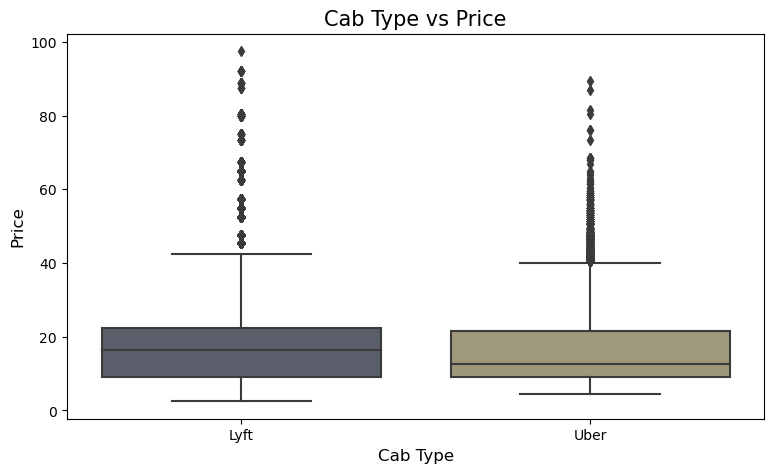

In [31]:
fig, ax = plt.subplots(figsize=(9, 5))

sns.boxplot(x='cab_type', y='price', data=df4, palette="cividis")

plt.xlabel("Cab Type", fontsize= 12)
plt.ylabel("Price", fontsize= 12)
plt.title("Cab Type vs Price", fontsize= 15)

Pada Boxplot Uber dan Lyft saling memiliki outlier yang cukup banyak, distribusi data tidak jauh berbeda.

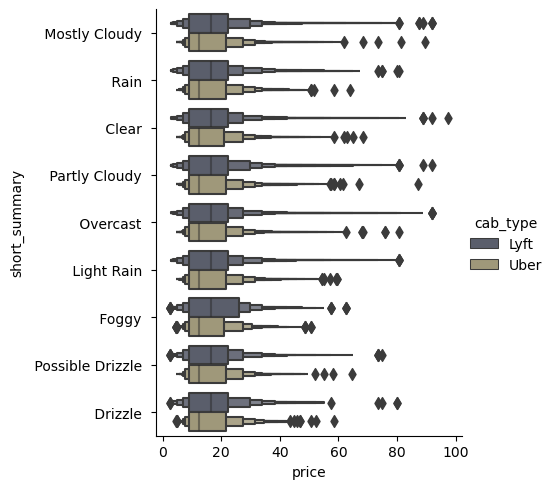

In [32]:
sns.catplot(x="price", y="short_summary", hue="cab_type", kind="boxen", 
            data=df4, palette='cividis')

Diperoleh bahwa distribusi Cuaca terhadap Tarif tidak terlalu berbeda signifikan, serta memiliki banyak outlier.

Text(0.5, 1.0, 'Cab Type vs Distance')

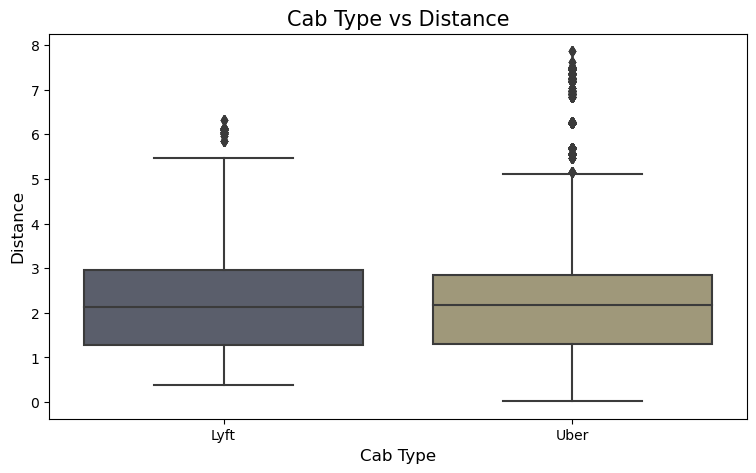

In [33]:
fig, ax = plt.subplots(figsize=(9, 5))

sns.boxplot(x='cab_type', y='distance', data=df4, palette="cividis")

plt.xlabel("Cab Type", fontsize= 12)
plt.ylabel("Distance", fontsize= 12)
plt.title("Cab Type vs Distance", fontsize= 15)


Diperoleh bahwa Uber memiliki jangkauan jarak yang cukup jauh dengan Lyft serta outlier Uber juga lebih banyak dari Lyft.

### Visualisasi Histogram

Memvisualisasikan jumlah Cab Type dengan Histogram

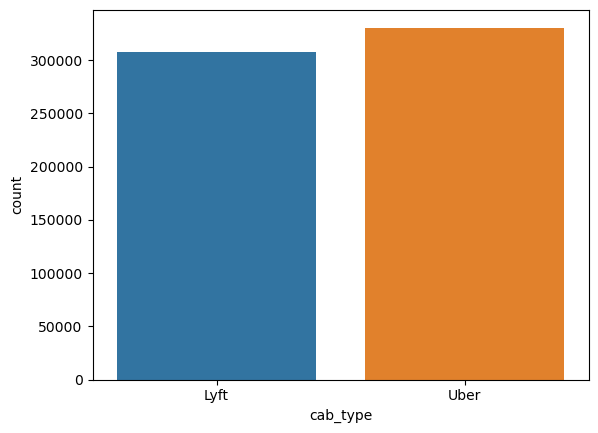

In [34]:
sns.countplot(x="cab_type", data=df4)
plt.show()

Dari hasil visualisasi di atas, didapatkan bahwa jumlah Lyft dan Uber tidak memiliki perbedaan yang signifikan. Namun Uber tetap menjadi Cab Type yang paling banyak dibandingkan Lyft

### Correlation Matrix

Membuat Correlation Matrix antar variabel untuk melihat hubungan satu sama lain

C:\Users\RHEINA\AppData\Local\Temp\ipykernel_14852\952811932.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df4.corr(), vmin=-1, vmax=1, annot=True)


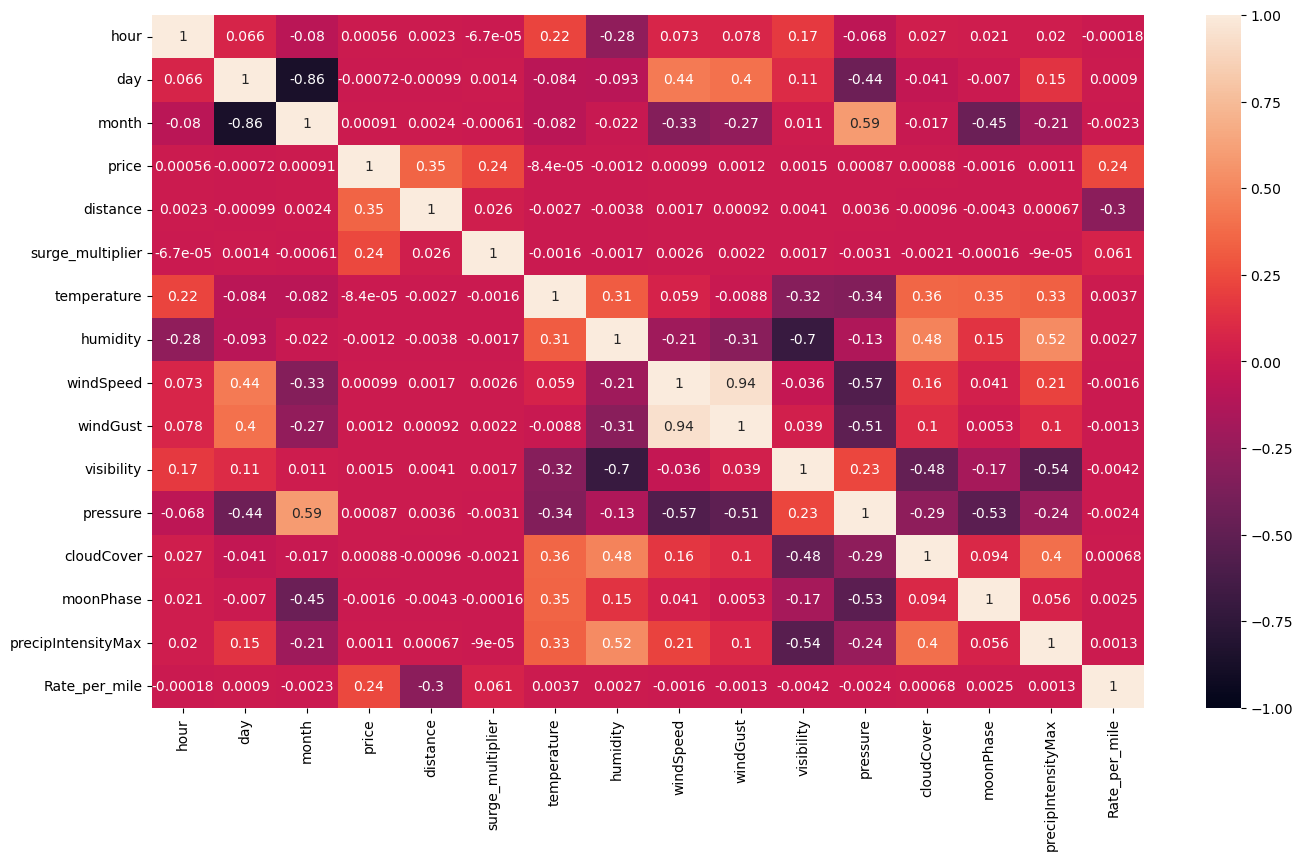

In [35]:
plt.figure(figsize=(16, 9))
sns.heatmap(df4.corr(), vmin=-1, vmax=1, annot=True)
plt.show()

Dari Correlation Matrix di atas didapatkan:
- Atribut day, temperature, humidity, moon phase memiliki korelasi negatif dengan price.
- Atribut selain yang disebutkan di atas memiliki korelasi positif terhadap price.
- Korelasi paling tinggi yakni price dengan destination, diikuti oleh tarif dengan surge multiplier.

## Data Preprocessing

Data preprocessing merupakan proses mempersiapkan data mentah menjadi bentuk yang sesuai untuk analisis atau pemodelan. 

Melakukan inisiasi variabel X dan Y

In [36]:
X = df4.drop(['price', 'Rate_per_mile'], axis=1)
y = df4['price']
print(X.shape)
print(y.shape)

(637976, 22)
(637976,)


### Encode 
<br> Melakukan encoding dengan Label Encoder pada atribut yang memiliki tipe data Object.

In [37]:
class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns

    def fit(self,X,y=None):
        return self

    def transform(self,X):
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)
    
    
encoding_pipeline = Pipeline([
    ('encoding',MultiColumnLabelEncoder(columns=["source", "destination", "cab_type", "name", "short_summary", "long_summary",
                                                 "day_of_the_week", "Route"]))
])
df5 = encoding_pipeline.fit_transform(df4)

Melihat 5 baris teratas dari dataset yang telah dilakukan encode

In [38]:
df5.head()

,hour,day,month,source,destination,cab_type,name,price,distance,surge_multiplier,temperature,short_summary,long_summary,humidity,windSpeed,windGust,visibility,pressure,cloudCover,moonPhase,precipIntensityMax,Rate_per_mile,day_of_the_week,Route
0,9,16,12,5,7,0,7,5.0,0.44,1.0,42.34,4,9,0.68,8.66,9.17,10.000,1021.98,0.72,0.30,0.1276,11.363636,3,33
1,2,27,11,5,7,0,2,11.0,0.44,1.0,43.58,8,10,0.94,11.98,11.98,4.786,1003.97,1.00,0.64,0.1300,25.000000,5,33
2,1,28,11,5,7,0,5,7.0,0.44,1.0,38.33,0,2,0.75,7.33,7.33,10.000,992.28,0.03,0.68,0.1064,15.909091,6,33
3,4,30,11,5,7,0,4,26.0,0.44,1.0,34.38,0,6,0.73,5.28,5.28,10.000,1013.73,0.00,0.75,0.0000,59.090909,0,33
4,3,29,11,5,7,0,6,9.0,0.44,1.0,37.44,6,4,0.70,9.14,9.14,10.000,998.36,0.44,0.72,0.0001,20.454545,4,33


Melakukan inisiasi variabel X dan Y sesudah dilakukan encode, lalu mengecek shape/ukuran setiap variabel

In [39]:
X_transform = df5.drop(['price', 'Rate_per_mile'], axis=1)
y = df4['price']
print(X.shape)
print(y.shape)

(637976, 22)
(637976,)


### Feature Selection

Melakukan feature selection menggunakan library SequentialFeatureSelector(SFS) dengan Metode Regresi Linier, banyak atribut 10, metode forward, evaluasi dengan R squared, dan cv dengan k=3.

In [40]:
df_sfs = SFS(LinearRegression(),
          k_features=10,
          forward=True,
          floating=False,
          scoring = 'r2', 
          cv = 3)

In [41]:
df_sfs.fit(X_transform, y)
df_sfs.k_feature_names_

('day',
 'month',
 'source',
 'destination',
 'cab_type',
 'name',
 'distance',
 'surge_multiplier',
 'short_summary',
 'Route')

Diperoleh hasil dengan 10 feature/atribut yang paling berpengaruh dalam model

Kemudian melakukan feature selection menggunakan library F regression dengan k=10

In [42]:
from sklearn.feature_selection import f_regression

X_transform = df5.drop(['price', 'Rate_per_mile'], axis=1)

bestfeatures = SelectKBest(score_func=f_regression, k=10)
fit = bestfeatures.fit(X_transform,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_transform.columns)
 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']

print("10 Features yang paling berpengaruh")
print(featureScores.nlargest(10,'Score'))

10 Features yang paling berpengaruh
               Specs          Score
6               name  334771.122826
7           distance   86228.749811
8   surge_multiplier   39151.469570
5           cab_type    4466.959446
4        destination    1371.722040
21             Route     582.615651
3             source     410.760893
20   day_of_the_week       5.225958
18         moonPhase       1.637163
15        visibility       1.428760


Setelah diperoleh feature yang paling berpengaruh pada model, dilakukan inisiasi final pada variabel X yang akan dijadikan training.

Dalam hal ini dipilih 8 atribut yang paling berpengaruh signifikan berdasarkan kedua uji feature selection yang telah dilakukan, yaitu atribut Name, Distance, Surge multiplier, Cab Type, Destination, Source, Day of the Week, dan Visibility.

In [43]:
X_fit = df5[['name', 'distance', 'surge_multiplier', 'cab_type', 'destination', 'source',
            'day_of_the_week', 'visibility']]

Melihat 5 baris teratas dari dataset X_fit

In [44]:
X_fit.head()

,name,distance,surge_multiplier,cab_type,destination,source,day_of_the_week,visibility
0,7,0.44,1.0,0,7,5,3,10.000
1,2,0.44,1.0,0,7,5,5,4.786
2,5,0.44,1.0,0,7,5,6,10.000
3,4,0.44,1.0,0,7,5,0,10.000
4,6,0.44,1.0,0,7,5,4,10.000


Melihat rangkuman informasi tentang dataset X_fit

In [45]:
X_fit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 637976 entries, 0 to 693070
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   name              637976 non-null  int32  
 1   distance          637976 non-null  float64
 2   surge_multiplier  637976 non-null  float64
 3   cab_type          637976 non-null  int32  
 4   destination       637976 non-null  int32  
 5   source            637976 non-null  int32  
 6   day_of_the_week   637976 non-null  int32  
 7   visibility        637976 non-null  float64
dtypes: float64(3), int32(5)
memory usage: 31.6 MB


Melihat ukuran dari dataset X_fit

In [46]:
X_fit.shape

(637976, 8)

Setelah diperoleh atribut yang akan dilakukan training, kemudian membagi data menjadi Training dan Testing dengan proporsi 0.8 dan 0.2

In [47]:
X_train, X_test, y_train, y_test = train_test_split(
    X_fit, y, test_size=0.20, random_state=325)

## Model Defining

Pada Final Project kali ini dilakukan pengujian pada training menggunakan metode regresi linier dengan pembanding random forest regressor. Alasan penggunaan metode ini yaitu tipe data prediksi yang berupa data kontinu, sehingga metode tersebut cocok digunakan.

Model pertama yakni model regresi linier dengan menghilangkan nilai intercept. Alasan penghilangan intercept dikarenakan tarif tidak bisa berdiri sendiri tanpa adanya faktor yang mempengaruhinya. Jika tidak ada faktor atau dapat dikatakan tidak ada histori X maka tarif bernilai 0.

In [48]:
df_lr1 = LinearRegression(fit_intercept=False) 

Model kedua yakni model regresi linier dengan melakukan normalisasi data menggunakan mean. Hal ini dikarenakan atribut yang digunakan memiliki variasi pada satuan, sehingga hal tersebut dapat diatasi dengan normalisasi data.

In [49]:
df_lr2 = make_pipeline(StandardScaler(with_mean=True), LinearRegression())

Model ketiga yakni model Random Forest Regressor. Model ini digunakan sebagai pembanding dari model Regresi linier. Parameter yang digunakan yakni n estimator sejumlah 50, dikarenakan dataset ini memiliki baris yang sangat banyak sehingga cabang tree yang digunakan dapat diperkecil.

In [50]:
df_regr = RandomForestRegressor(n_estimators = 50, random_state = 13)

## Model Training

Model Training dilakukan untuk membuat model yang dapat memahami pola dalam data dan menghasilkan hasil yang baik saat diterapkan pada data yang tidak pernah dilihat sebelumnya. 

In [51]:
lm_model1 = df_lr1.fit(X_train, y_train)

In [52]:
lm_model2 = df_lr2.fit(X_train, y_train)

In [53]:
regr_model = df_regr.fit(X_train, y_train)

## Model Evaluation

Model Evaluation dilakukan untuk memahami sejauh mana model dapat memprediksi atau mengklasifikasikan data dengan benar, sekaligus mengidentifikasi kelemahan model yang perlu diperbaiki atau dioptimalkan

Linear Regression train R squared: 0.5131
Linear Regression test R squared: 0.5151
Linear Regression test RMSE: 6.5013


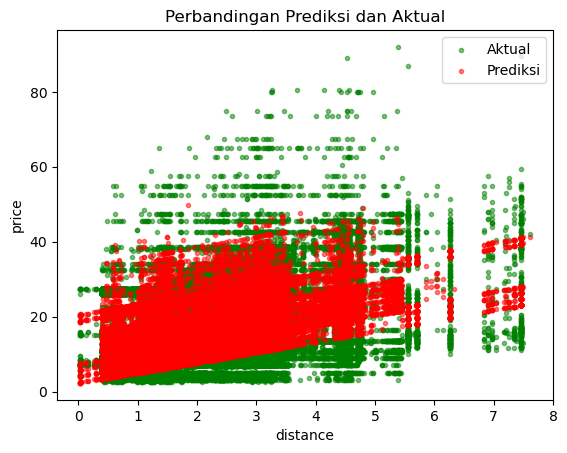

In [54]:
y_pred = lm_model1.predict(X_test)
lr_train_r2 = df_lr1.score(X_train, y_train)
lr_test_r2 = df_lr1.score(X_test, y_test)
print('Linear Regression train R squared: %.4f' % lr_train_r2)
print('Linear Regression test R squared: %.4f' % lr_test_r2)

lr_mse = mean_squared_error(y_pred, y_test)
lr_rmse = np.sqrt(lr_mse)
print('Linear Regression test RMSE: %.4f' % lr_rmse)

x_axis = X_test.distance 

plt.scatter(x_axis, y_test, c = 'g', alpha = 0.5, marker = '.', label = 'Aktual')
plt.scatter(x_axis, y_pred, c = 'r', alpha = 0.5, marker = '.', label = 'Prediksi')
plt.xlabel('distance')
plt.ylabel('price') 
plt.title("Perbandingan Prediksi dan Aktual")
plt.legend(loc = 'upper right')
plt.show()

Linear Regression train R squared: 0.5138
Linear Regression test R squared: 0.5159
Linear Regression test RMSE: 6.4958


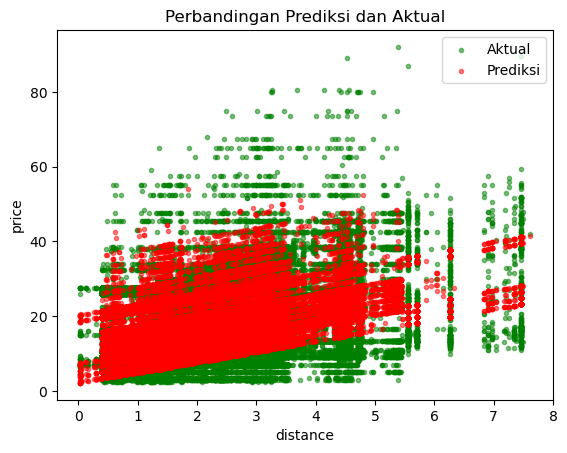

In [55]:
y_pred = lm_model2.predict(X_test)
lr_train_r2 = df_lr2.score(X_train, y_train)
lr_test_r2 = df_lr2.score(X_test, y_test)
print('Linear Regression train R squared: %.4f' % lr_train_r2)
print('Linear Regression test R squared: %.4f' % lr_test_r2)

lr_mse = mean_squared_error(y_pred, y_test)
lr_rmse = np.sqrt(lr_mse)
print('Linear Regression test RMSE: %.4f' % lr_rmse)

x_axis = X_test.distance 

plt.scatter(x_axis, y_test, c = 'g', alpha = 0.5, marker = '.', label = 'Aktual')
plt.scatter(x_axis, y_pred, c = 'r', alpha = 0.5, marker = '.', label = 'Prediksi')
plt.xlabel('distance')
plt.ylabel('price') 
plt.title("Perbandingan Prediksi dan Aktual")
plt.legend(loc = 'upper right')

plt.show()

Random Forest train R squared is: 0.9874
Random Forest test R squared": 0.9625
Random Forest RMSE: 1.8075


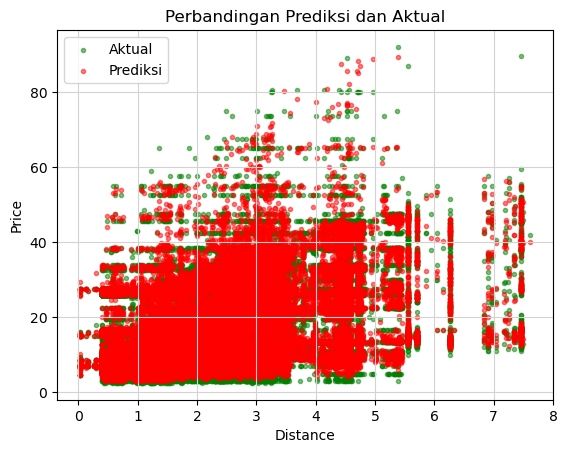

In [56]:
pred = regr_model.predict(X_test)
l_rf_train_r2 = regr_model.score(X_train,y_train)
l_rf_test_r2 = regr_model.score(X_test, y_test)
print('Random Forest train R squared is: %.4f' % l_rf_train_r2)
print('Random Forest test R squared": %.4f' % l_rf_test_r2)

l_forest_mse = mean_squared_error(pred, y_test)
l_forest_rmse = np.sqrt(l_forest_mse)
print('Random Forest RMSE: %.4f' % l_forest_rmse)

x_axis = X_test.distance

plt.scatter(x_axis, y_test, c = 'g', alpha = 0.5, marker = '.', label = 'Aktual')
plt.scatter(x_axis, pred, c = 'r', alpha = 0.5, marker = '.', label = 'Prediksi')
plt.xlabel('Distance')
plt.ylabel('Price') 
plt.title("Perbandingan Prediksi dan Aktual")
plt.grid(color = '#D3D3D3', linestyle = 'solid')
plt.legend(loc = 'upper left')
plt.show()

Dari hasil visualisasi scatter di atas, didapatkan bahwa:

- Kedua model memiliki nilai evaluasi model yang tidak jauh berbeda.
- Data yang tidak dilakukan normalisasi memiliki evaluasi model lebih baik daripada yang dilakukan normalisasi.
- Model pembanding yakni model Random Forest Train, memiliki evaluasi paling baik diantara ketiga model.
- Model akhir yang digunakan dalam analisis ini untuk selanjutnya diterapkan dalam deployment adalah model pertama, dikarenakan tujuan analisis ini membuat model prediksi menggunakan metode regresi linier karena model ketiga hanya bertujuan sebagai pembanding

## Model Inference

Model Inference dilakukan untuk mengaplikasikan model yang telah ada ke situasi dunia nyata untuk memperoleh wawasan, membuat keputusan, atau memprediksi hasil. 

In [57]:
X_new = {'name':[1,2,3], 'distance':[1,2,3], 'surge_multiplier':[1.25,2,3], 'cab_type':[0,1,0], 'destination':[1,2,3], 
         'source':[1,2,3],'day_of_the_week':[1,2,3], 'visibility':[1,2,3]}
X_new = pd.DataFrame(X_new)

Melakukan prediksi pada data baru

In [58]:
y_pred1 = lm_model2.predict(X_new)
print('Prediksi Tarif yaitu: ')
print(y_pred1)

Prediksi Tarif yaitu: 
[23.931241   42.83979385 62.22009798]


## Conclusion

Dari analisis yang telah dilakukan, diperoleh kesimpulan sebagai berikut:

- Dari dataset awal yang memiliki Terdapat 57 atribut yang diasumsikan memengaruhi tarif taksi online, dilakukan analisis lalu diambil 8 atribut/faktor yang paling berpengaruh dalam model.
- Faktor-faktor yang berpengaruh signifikan terhadap tarif taksi online yaitu Cab Type, Distance, Surge Multiplier, Name of Cab Type, Destination, Source, Day of the Week, dan Visibility.
- Model regresi linier yang paling optimal yaitu model pertama, dengan tidak normalisasi pada data dengan R squared train 0.5131 dan test 0.5151 diperoleh RMSE 6.5013.
- Model lain yang dapat digunakan pada dataset berikut yaitu model ketiga dengan metode Random Forest Regressor. Model ketiga memiliki evaluasi model terbaik dari ketiga model lainnya, yaitu diperoleh 0.9874 untuk R squared train, 0.9625 untuk R squared test, dan 1.8075 untuk RMSE.

In [59]:
pickle.dump(lm_model1, open('lm_model1.pkl', "wb"))